In [16]:
#hide earrings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [6]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [7]:
df = pd.read_csv('headbrain.csv')
print(df.shape)
df

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [57]:
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values
x_mean = np.mean(X)
y_mean = np.mean(Y)
n = len(X)

In [59]:
numer = 0
denom = 0 
for i in range(n):
    numer += (X[i] - x_mean) * (Y[i] - y_mean)
    denom += (X[i] - x_mean) ** 2
m = numer/denom
c = y_mean - m*x_mean

In [60]:
print("Slope: m = ",m,'\n','y_intercept: c =',c)

Slope: m =  0.26342933948939945 
 y_intercept: c = 325.57342104944223


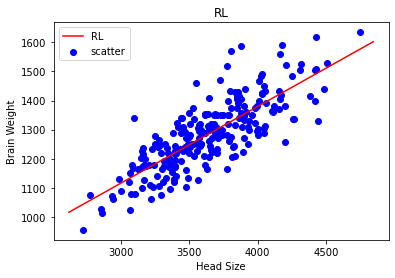

In [67]:
x_max = np.max(X)+100
x_min = np.min(X)-100
#calculatING the line va;ue of x and y 
x = np.linspace(x_max, x_min, 1000)
y = m*x + c 
plt.plot(x,y,color='red', label="RL")
plt.scatter(X,Y,color='blue',label='scatter')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.title('RL')
plt.legend()
plt.show()

In [46]:
np.max(X)+100

4847

In [84]:
ss_t = 0 
ss_r = 0
for i in range(n):
    pred_y = X[i] * m + c
    ss_r += (pred_y - Y[i]) ** 2
    ss_t += (Y[i] - y_mean) ** 2
r2 = 1 - (ss_r/ss_t)
print("(r_square) value: r2 = ",r2)

(r_square) value: r2 =  0.6393117199570003


# smart way

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape((n,1))
reg = LinearRegression()
reg_fit = reg.fit(X,Y)
Y_pred = reg.predict(X)
r2_score = reg.score(X,Y)
r2_score

0.639311719957